## 1- Introduction 
#### Project Information 
* We hope to use the dataset to find a trend in the Australian weather. Having a decade worth of data will let us understand the impact of global warming on the Australian climate, this will be reflected in other observations in this dataset. This dataset can be a strong example of global warming and the effects of it on a more macro-environment. 

#### Dataset
* The dataset we have chosen is provided by the Australian Government’s Bureau of Meteorology. The dataset contains ten years (2008 to mid-2017,) of daily weather observations from many locations in Australia. The data consists of many different measurements that were measured at two different times of the day.
* Throught out the EDAs plotted below we will be using 2 main datasets. One dataset is concentrated on the city of Sydney and the other dataset is focused on major cities across Australia. 

#### Features 
* The columns of the data consists of location, temperature in celsius, evaporation in mm, sunshine in hours, wind direction, wind speed in km/h, humidity in percentage, Atmospheric pressure in hpa, clouds in okatas ('Okatus' is a unit to measure clouds in the sky). 
* Dataset consits of rich data observations across Australia. 

#### Question 
* Using the data with observed values how can we see global warming in forms of change in temperature, percipitation, and other factors. 


---

### 2- Observations/EDA 

The initial research question was to figure out how global warming has progressed over time. We intended to find evidence of climate change over the dataset. However, as we have conducted some initial EDAs, we concluded that a data analysis on climate change will be difficult given the limited time span of data(10 years of data). A few examples of a EDAs trying to show the difference in temperature change over the past 10 years are plotted below. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../../data/raw/weatherAUS.csv')

data=df

In [3]:
### Dropping columns evaporation and sunshine beucase 40% are NA values. 

df2= df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm','RainToday','RainTomorrow'])



In [4]:
### changing column name rainfall to percipitation 
df3 = df2.rename(columns={'Rainfall':"Percipitation"})



In [5]:
df4 = df3.dropna()


In [49]:
df5 = df4.reset_index(drop=True)



#### How wind flows through Australia
- Inital objective was to find out if there is a general trend in how the weather moves across Australia. 

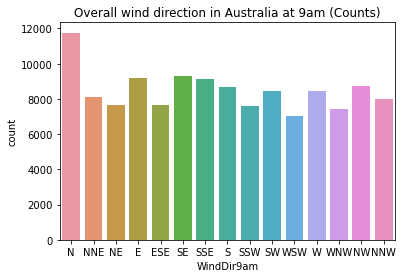

In [8]:
### plotting frequency in wind direction observed at 9am 
plot_wind_count9am = sns.countplot(data=df,
                                   x= 'WindDir9am',
                                   order = ['N',"NNE","NE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]).set_title("Overall wind direction in Australia at 9am (Counts)")

The plot above is a plot counting the frequencies of the wind directions at 9am. As we can see there are more winds coming from the north and the other directions are around the same frequency. 

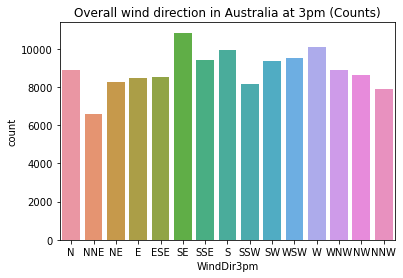

In [10]:
### plotting frequency in wind direction observed at 3pm 
plot_wind_count_3pm = sns.countplot(data=df,
                                    x='WindDir3pm',
                                    order = ['N',"NNE","NE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]).set_title("Overall wind direction in Australia at 3pm (Counts)")

Again, the plot above shows the counts of wind direction at 3pm. Comparing to the chart at 9am there are less winds coming from the north and more winds coming from the south. 

However, we can see that there is not much of a difference in the wind direction across Australia as a whole. 
This plot was to see if there was a general trend in how the wind moves across Australia as it can indicate how the weather moves across the continent. 

---

### Looking into one specific city and visualising data
- As another EDA we have decided to focus on one city and see if there are any climate changes over the years. 
- The selected city is Sydney 
- We plotted visualizations to see wheather there are any visual temperature rising in the city of Sydney


In [23]:
### subsetting city of Sydney

data = df[df["Location"]=='Sydney']


Text(0.5, 0.98, 'Temperatures at 3pm over the dates (Celsius)')

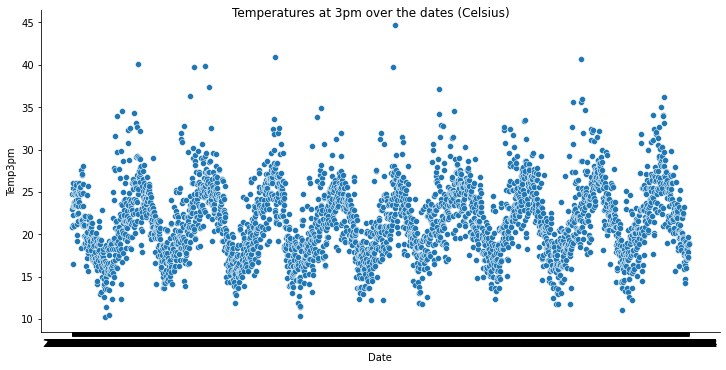

In [24]:
import matplotlib.pyplot as plt
plot_sydney = sns.relplot(x='Date',
                         y= "Temp3pm",
                         data=data,
                         aspect = 2)
plot_sydney.fig.suptitle("Temperatures at 3pm over the dates (Celsius)")

Plotting the temperatures at 3pm at Austalia making the x-axis the date. The initial goal was to see how temperature has changed over time. In this plot it is difficult to prove that there are changes. 

#### Now a different plot to see how temperatues changed


In [6]:
data_in_sydney=  data[data["Location"]=='Sydney']


In [7]:
data_in_sydney['Datetime'] = pd.to_datetime(data_in_sydney['Date']).dt.year


<ipython-input-7-aa8461789fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_in_sydney['Datetime'] = pd.to_datetime(data_in_sydney['Date']).dt.year


In [8]:
data_in_sydney['Month_and_day'] = pd.to_datetime(data_in_sydney['Date']).dt.strftime('%m-%d')


<ipython-input-8-6ef7e7e7e237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_in_sydney['Month_and_day'] = pd.to_datetime(data_in_sydney['Date']).dt.strftime('%m-%d')


In [9]:
data_in_sydney

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Datetime,Month_and_day
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2008,02-01
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2008,02-02
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2008,02-03
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2008,02-04
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2008,02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,2017,06-21
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,2017,06-22
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,2017,06-23
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No,2017,06-24


* The dataset above only consists the city of Sydney. A new column with only months and dates are added in order to separate the years in the next plot.  

Text(0.5, 0.98, 'Traceplot of the temperatures at 3pm over the dates. Categorized by each year. (Celsius)')

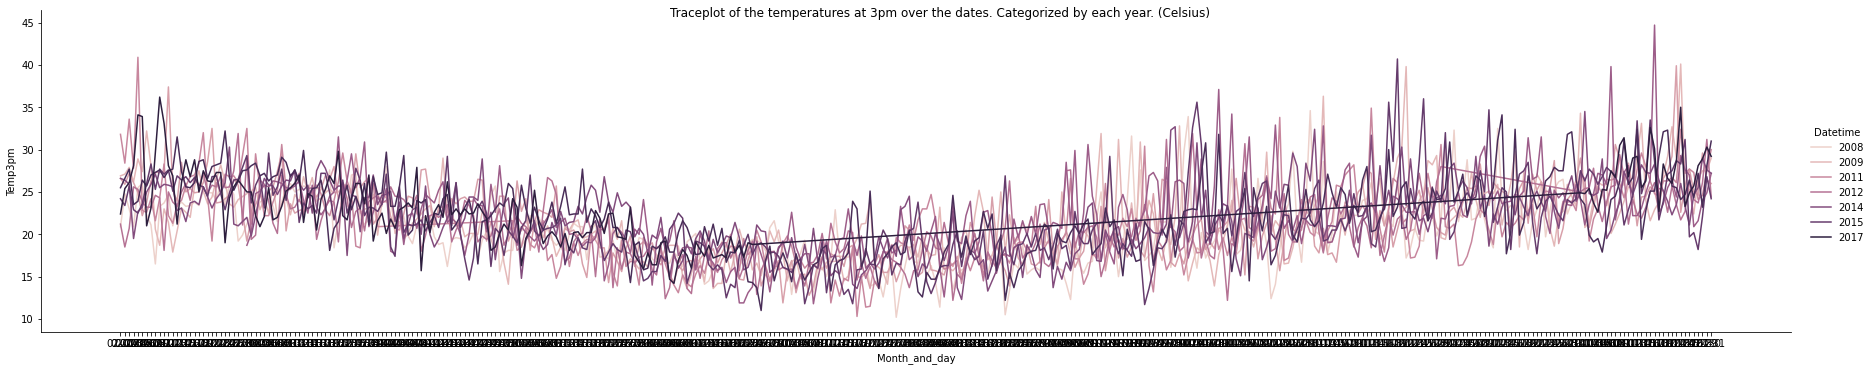

In [31]:
plot_sydney = sns.relplot(x="Month_and_day", 
                          y="Temp3pm", 
                          kind="line", 
                          hue="Datetime",
                          aspect=5,
                          data=data_in_sydney)
plot_sydney.fig.suptitle("Traceplot of the temperatures at 3pm over the dates. Categorized by each year. (Celsius)")


- This plot is a trace plot of the temperatures at 3pm over all of the dates of the year. The years are separeted in different trace lines to see the difference in temeperatures at 3pm. 
- Since Australia is in the Southern hemisphere we can see temperatues in June and July are lower and the temperatures in December and January are higher. Summer for the northern hemisphere is winter for the southern hemisphere. 
- However, we cannot see a significant difference in the temperatures changes over the years. 

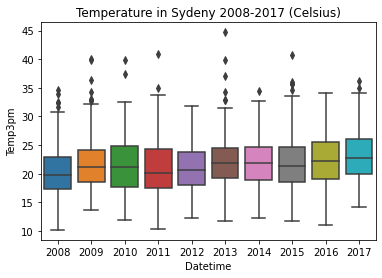

In [32]:
### box plot with temperature at 3pm

Sydney_box = sns.boxplot(x="Datetime", y="Temp3pm", data=data_in_sydney).set_title("Temperature in Sydeny 2008-2017 (Celsius)")

This is a boxplot indicating the temperatures at 3pm in Sydney. The middle lines in the boxplot indicates the mean temperatures. 

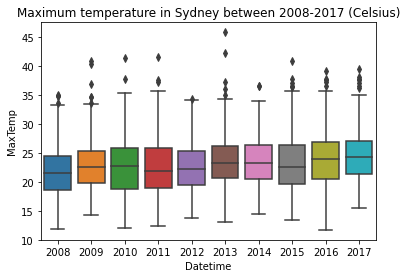

In [33]:
### box plot with max temperatures 
Sydney_max = sns.boxplot(x="Datetime", y="MaxTemp", data=data_in_sydney).set_title("Maximum temperature in Sydney between 2008-2017 (Celsius)")

This is a boxplot indicating the maximum temperatures at Sydney. As we can see there are no significant changes in the temperatures over time. 

Text(0.5, 1.0, 'Violin plot indicated MaxTemperatues at Sydney (Celsius)')

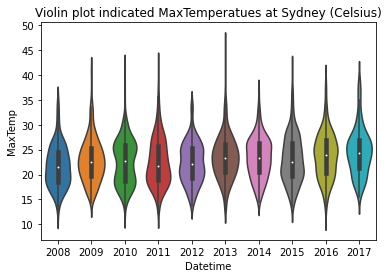

In [11]:
sns.violinplot(x='Datetime', y="MaxTemp", data=data_in_sydney).set_title("Violin plot indicated MaxTemperatues at Sydney (Celsius)")

This is a violin plot showing the maximum temperatures obsered at sydney. By looking at the thickness or width of the violin plots we can also see the frequency of those observed maximum temperatures. 

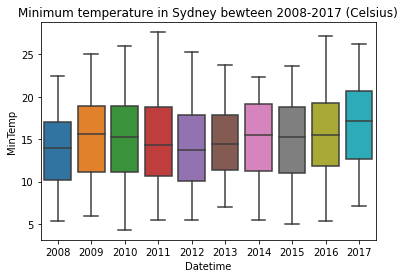

In [12]:
### box plot with min temeperatures 
Sydney_max = sns.boxplot(x="Datetime", y="MinTemp", data=data_in_sydney).set_title("Minimum temperature in Sydney bewteen 2008-2017 (Celsius)")

Again, this is a boxplot indicating the minimum temperatues at Sydney over the years 

#### Conclusions from the plots 
- We need to be careful when evaluating the temperatures over the years. The observed data starts from October 7th 2007 and ends in June 24th 2017. 
- The core "winter" times in Australia are out of the dataset for 2017 and makes the dataset incomplete. This maybe the fact that makes the boxplots with higher temperatures in 2017. 
- If the dataset for 2017 was collected until October 7th we should have the boxplot located lower for the year 2017. 

### 3- Observations/EDA
As we can see from various plots above, it is difficult to simply show temperture increases over time. 
Therefore, a shift in the research question is necessary. We have decided to show climate differences acorss Australia, given the dataset's rich values collected that are separated all over the Australian continent. 

The selected cities are 
1. Carins
2. Brisbane
3. Sydeny
4. Melbourne 
5. Adelaide 
6. Alice Springs 
7. Uluru
8. Perth
9. Darwin



![Australia]('https://www.mapsofworld.com/australia/cities/cities-in-australia.jpg')

A map of Australia is also attached to see where the cities are geologically located. 

In [15]:
data_major = (df4.loc[data['Location'].isin(['Cairns','Brisbane','Sydney','Melbourne','Adelaide','AliceSprings','Uluru','Perth','Darwin'])])


The dataset now only contains the selected cities we are interested in along with the columns with weather observations. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

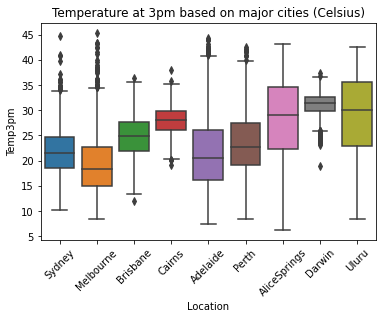

In [16]:
### Temperatue difference Across Australia 

temp_major_box = sns.boxplot(x="Location", y="Temp3pm", data=data_major).set_title("Temperature at 3pm based on major cities (Celsius)")
plt.xticks(rotation = 45)

This boxplot shows the temepeartues observed at 3pm in selected major cities. We can see Alice Springs and Uluru have higher average temperatues, since these cities are located in the center of Australia and are desert like condiditons. Darwin also has a higher average temperature. This is due to the fact that Darwin is located up north of Australia and is closer to the equator. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

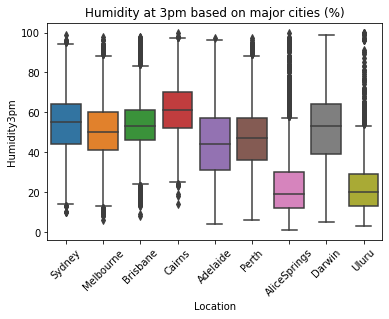

In [17]:
### humidity difference Across Australia 
humidity_major_box = sns.boxplot(x="Location", y="Humidity3pm", data=data_major).set_title("Humidity at 3pm based on major cities (%)")
plt.xticks(rotation = 45)

This boxplot shows the humidity observed at 3pm in major cities across Australia. Again we can see Alice Springs and Uluru with low humidity due to its geographical location where it is desert like. On the other hand, we can see that thoses cities that are along the coast of Australia have a higher humidity since they are closer to the ocean. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

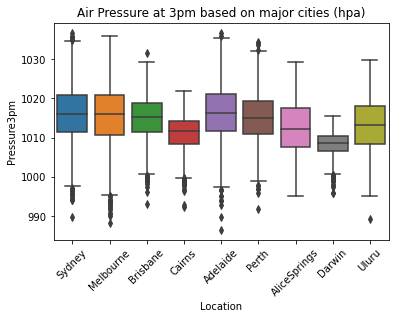

In [18]:
### airpressure difference Across Australia 

pressure_major_box = sns.boxplot(x="Location", y="Pressure3pm", data=data_major).set_title("Air Pressure at 3pm based on major cities (hpa)")
plt.xticks(rotation = 45)

This boxplot shows the Atmospheric pressure observed at 3pm in major cities. Majority of the cities have similar pressures. However, Cains and Darwin have lower average atmospheric pressure. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

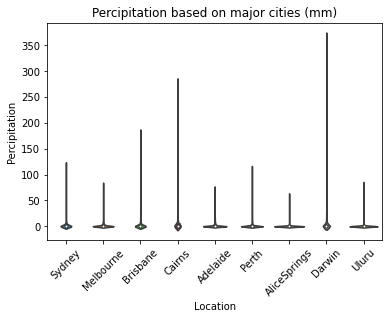

In [19]:

sns.violinplot(x='Location', y="Percipitation", data=data_major).set_title("Percipitation based on major cities (mm)")
plt.xticks(rotation = 45)

The above is a attempted violin plot indicating the percipitation across major citeis in Australia. We can see Cains and Darwin have longer whiskers indicated more thatn usual percipitation. On the other hand, Alice Springs and Uluru have low percipitation due to its desert like location. The increase in percipitation for Calms and Darwin maybe due to the fact that they have lower atmospheric pressures, which can cause more clouds and percipitation. 

Text(0.5, 0.98, 'Record of Percipitation Based on Major Cities (mm)')

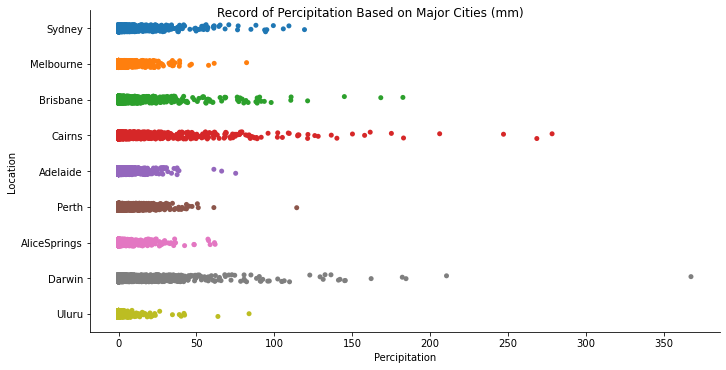

In [20]:
### Showing differences in rainfall across Australia. 
rain_major_box = sns.catplot(x="Percipitation", y="Location", data=data_major, aspect=2)
rain_major_box.fig.suptitle("Record of Percipitation Based on Major Cities (mm)")

The plot above is a plot of percipitation in mm in major cities. As we can see Cairns and Darwin observed more percipitation compared to the other locations across Australia. 

#### 4- Observations/EDA
As expected, there are clear climate differences across Australia. 
Both temperature at 3pm, humidity a 3pm, air pressure at 3pm, and rainfall varies across Australia. Differece could be largly due to the fact that cities that are inward of Austalia tend to be drier and those cities across the coast line tend to be more humid. The difference in temperature can also be the difference the latitude of the city. Those who are up north are closer to the equator and those who are down south are further from the equator. 


- Is is in fact true that the average temperature in cities that are up north and those that are inward have higher temperatures. 
- We can also see that the humidity is drastically different in the cities that are inward of Australia. Alice Springs and Uluru, which are located in the middle of Australia are less humid compared to those cities along the coast side. This is mainly due to inland climates. 
- Air pressure seems to be consistent over Australia. Not many dractic differences in averages.  
- Darwin, Caims, Brisbane, and Sydney seem to have more rainfall compared to other locations. Futher analysis can be conducted on the reasons why these cities have more rainfall. As expected the inner locations have small rainfall. Unexpectedly, Adelaide, a location close to the ocean has small percipitation. 


## 5- Analysis 

#### Research question: 
